In [95]:
import pandas as pd
data = pd.read_csv(r"C:\Users\202016202\Downloads\WA_Fn_UseC_Telco Customer Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [97]:
import pandas as pd
data = pd.read_csv(r"C:\Users\202016202\Downloads\WA_Fn_UseC_Telco Customer Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [99]:
data.describe(exclude = 'number')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [101]:
#Check for missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [103]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [105]:
import numpy as np

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>,
        <Axes: title={'center': 'ChurnTarget'}>, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

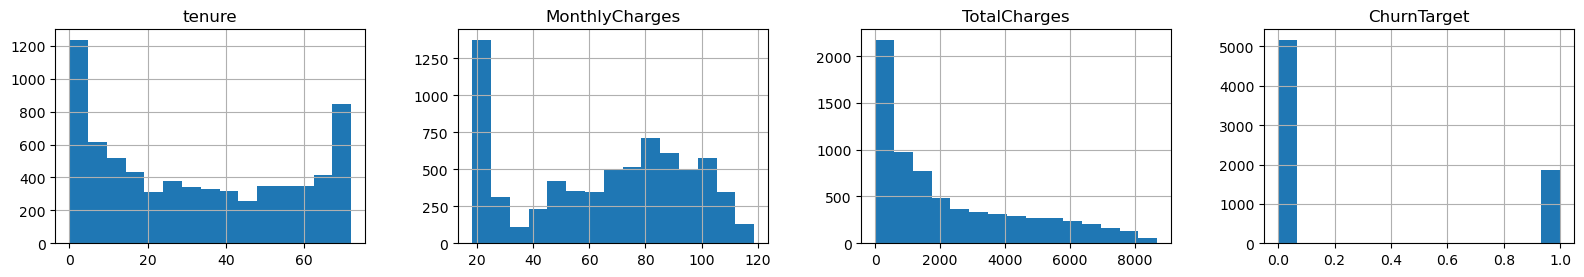

In [107]:
data['TotalCharges'] = data['TotalCharges'].replace('', np.nan)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0)

data['SeniorCitizen'] = data['SeniorCitizen'].astype('str')
data['ChurnTarget'] = data['Churn'].apply(lambda x: 1 
                                           if x == 'Yes'
                                           else 0)
data['ChurnTarget'] = data['Churn'].apply(lambda x: 1 
                                           if x == 'Yes' 
                                           else 0)
num_features = data.select_dtypes('number').columns
data[num_features].hist(bins=15, figsize=(30, 10), layout=(3, 6))

In [108]:
import matplotlib.pyplot as plt

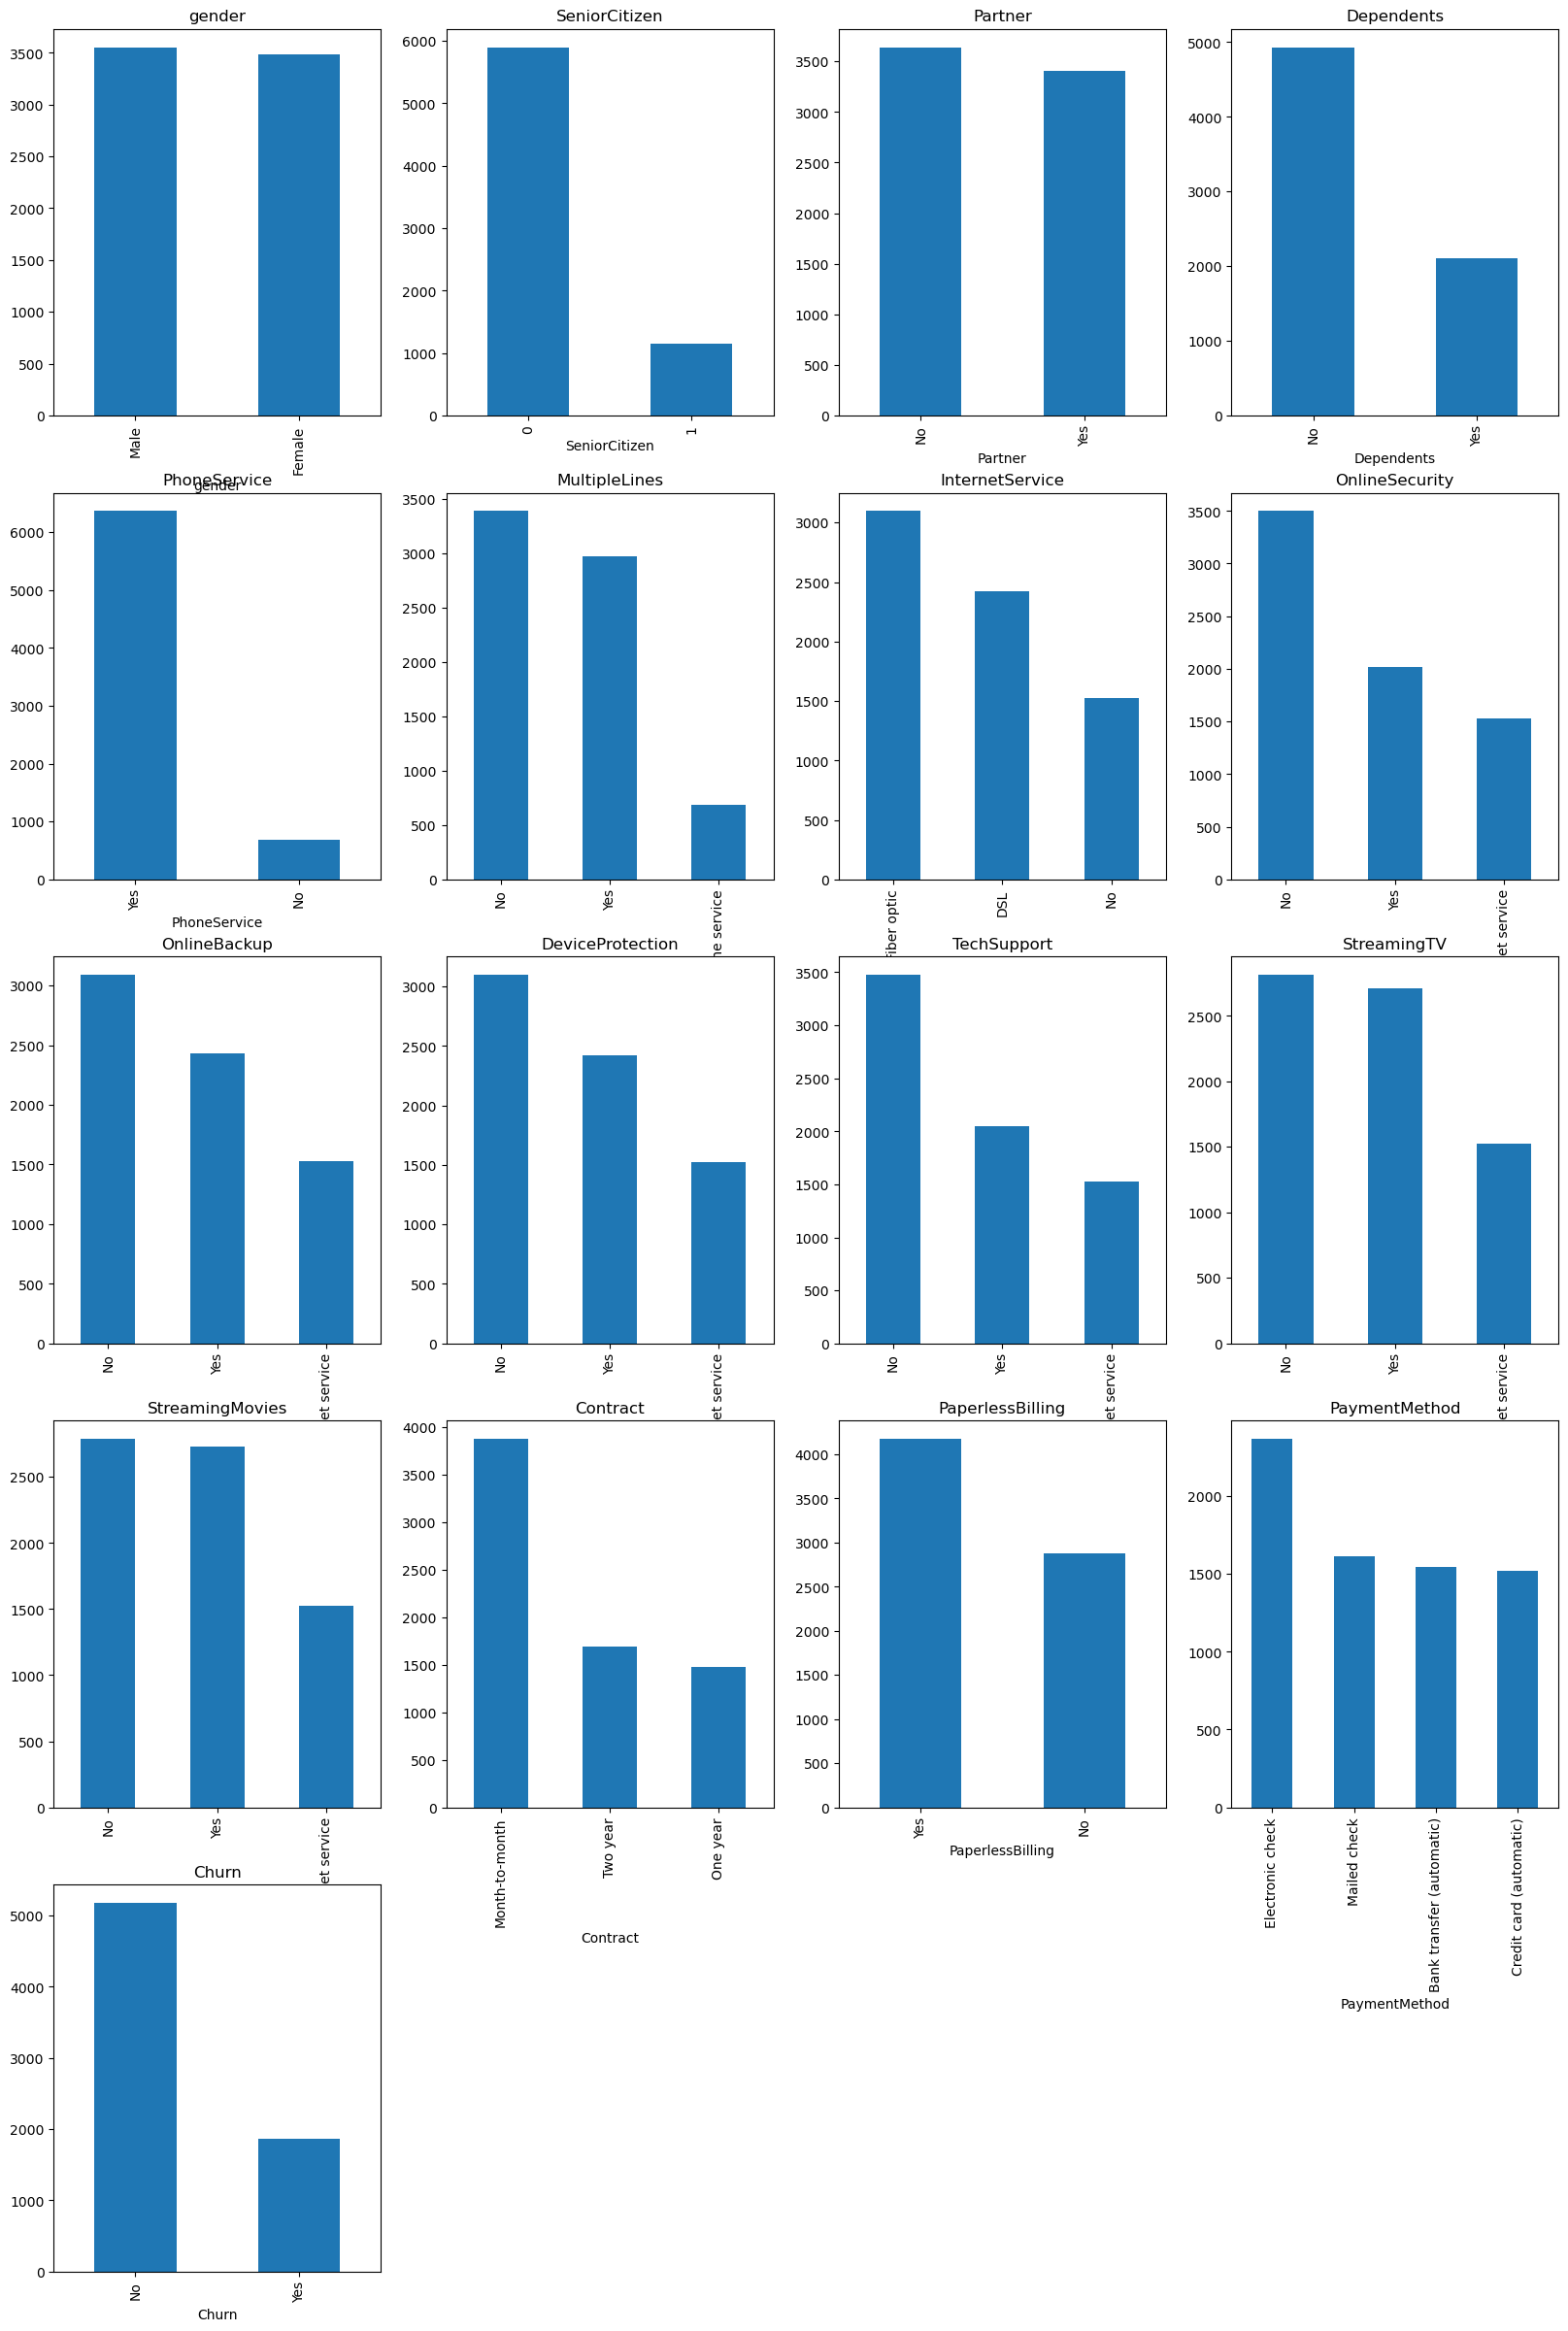

In [109]:
#distribution of categorical features
cat_features = data.drop('customerID', axis = 1).select_dtypes(include = 'object').columns

plt.figure(figsize = (20, 30))
for i, col in enumerate(cat_features, 1):
    plt.subplot(5, 4, i)
    data[col].value_counts().plot(kind = 'bar')
    plt.title(col)

In [110]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Heatmap')

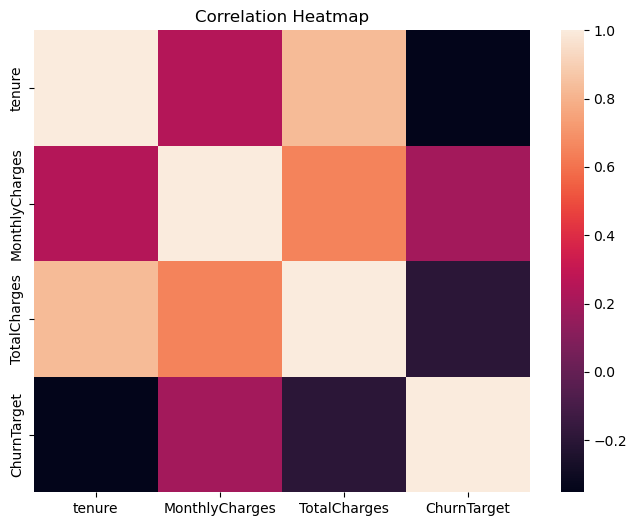

In [111]:
#Correlation between numerical features
plt.figure(figsize = (8, 6))
sns.heatmap(data[num_features].corr())
plt.title('Correlation Heatmap')

<Axes: >

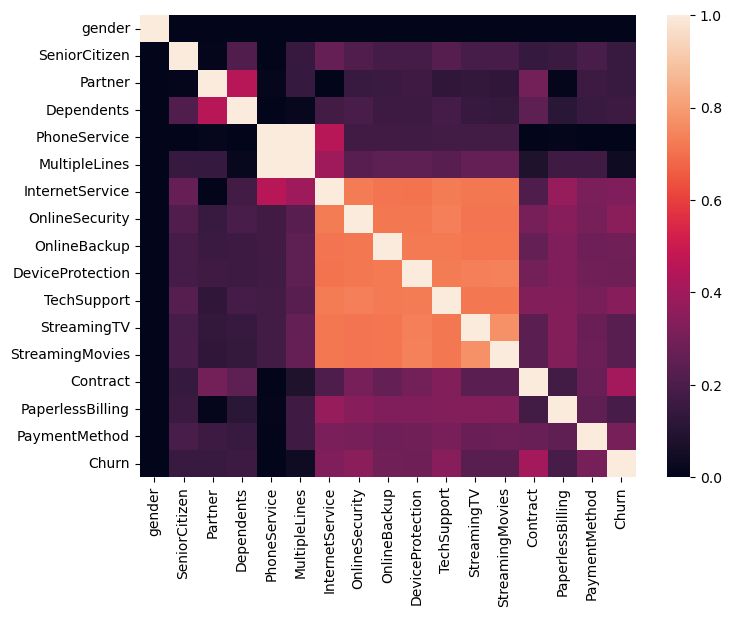

In [112]:
from dython.nominal import associations

#Calculate the Cramer's V and correlation matrix
assoc = associations(data[cat_features], nominal_columns = 'all', plot = False)
corr_matrix = assoc['corr']

#Plot the heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix)

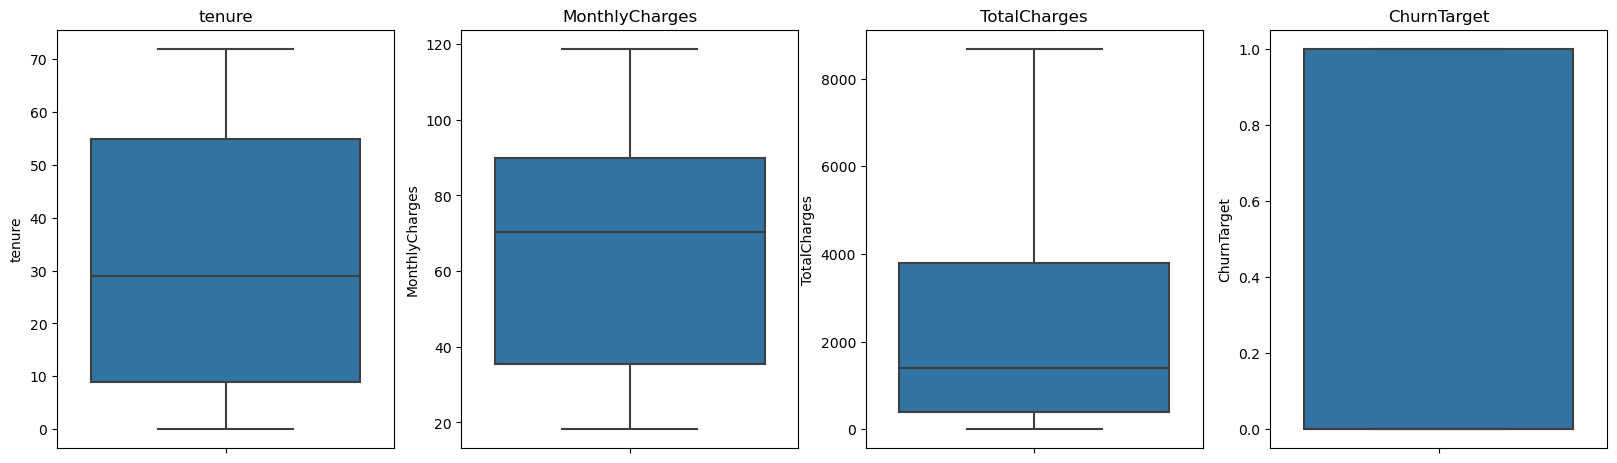

In [113]:
# Box plots to identify outliers
plt.figure(figsize=(20, 25))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)

In [115]:
target = 'ChurnTarget'
num_features = data.select_dtypes(include = [np.number]).columns.drop(target)

#Calculate the correlations
correlations = data[num_features].corrwith(data[target])

#Set a threshold for feature selection
threshold = 0.3
selected_num_features = correlations[abs(correlations) > threshold].index.tolist()

In [118]:
categorical_target = 'Churn'

assoc = associations(data[cat_features], nominal_columns = 'all', plot = False)

threshold = 0.3
selected_cat_features = corr_matrix[corr_matrix.loc[categorical_target] > threshold].index.tolist()

del selected_cat_features[-1]

In [119]:
selected_features = []
selected_features.extend(selected_num_features)
selected_features.extend(selected_cat_features)

print(selected_features)

['tenure', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaymentMethod']


In [122]:
from sklearn.model_selection import train_test_split

In [123]:
target = 'ChurnTarget'

X = data[selected_features]
y = data[target]

cat_features = X.select_dtypes(include = ['object']).columns.tolist()
num_features = X.select_dtypes(include = ['number']).columns.tolist()

#Spliting data into Train, Validation, and Test Set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state = 42, stratify = y_train_val)

In [125]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

#Prepare the preprocessing part
preprocessor = ColumnTransformer(
    transformers = [('num', 'passthrough', num_features),
                    ('cat', OneHotEncoder(), cat_features)])

pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                             ('classifier', LogisticRegression(max_iter = 1000))])

#Train the logistic regression model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['tenure']),
                                                 ('cat', OneHotEncoder(),
                                                  ['InternetService',
                                                   'OnlineSecurity',
                                                   'TechSupport', 'Contract',
                                                   'PaymentMethod'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [129]:
from sklearn.metrics import classification_report

#Evaluation on the validation set
y_val_pred = pipeline.predict(X_val)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

#Evaluate on the test set
y_test_pred = pipeline.predict(X_test)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [131]:
from sklearn.model_selection import GridSearchCV

In [133]:
# Define logistic regression model within a pipeline
pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                             ('classifier', LogisticRegression(max_iter=1000))])  # Corrected typo in 'classifier'

# Define hyperparameters for gridsearchCV
param_grid = { 'classifier__C': [0.1, 1, 10, 100],  # Moved 'C' parameter to the LogisticRegression model
              'classifier__solver': ['lbfgs', 'liblinear']  # Moved 'solver' parameter to the LogisticRegression model
}

# Perform GridSearch with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Best Hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on the validation set
y_val_pred = grid_search.predict(X_val)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate on the test set
y_test_pred = grid_search.predict(X_test) 
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Best Hyperparameters: {'classifier__C': 1, 'classifier__solver': 'lbfgs'}
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [143]:
!pip install xgboost
!pip install lightgbm

In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import recall_score, classification_report

C:\Users\202016202\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:51:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\202016202\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:51:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\202016202\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:51:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:Bo

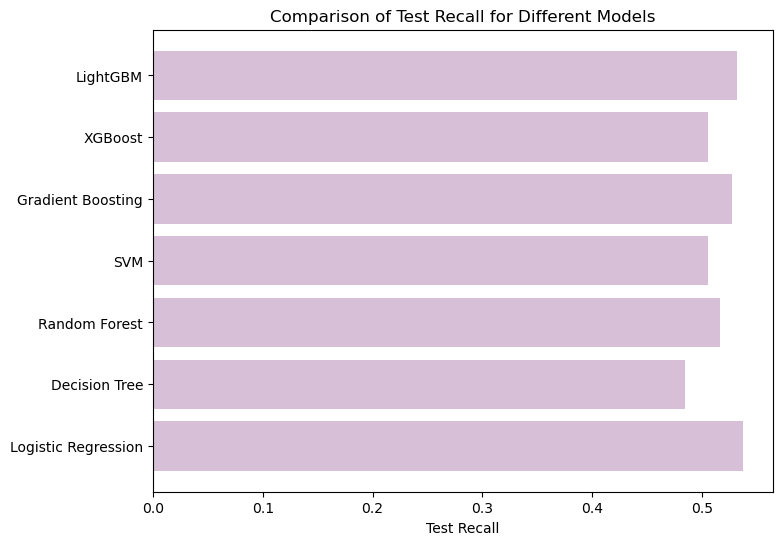

In [158]:
# Define the models and their parameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__solver': ['lbfgs', 'liblinear']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [None, 10, 20, 30],
            'classifier__min_samples_split': [2, 10, 20]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__kernel': ['linear', 'rbf']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__max_depth': [3, 6, 9]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__num_leaves': [31, 50, 100]
        }
    }
}

results = []

# Train and evaluate each model
for model_name, model_info in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model_info['model'])
    ])
    
    grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, scoring='recall')
    grid_search.fit(X_train, y_train)
    
    # Best model from Grid Search
    best_model = grid_search.best_estimator_
    
    # Evaluate on the validation set
    y_val_pred = best_model.predict(X_val)
    val_recall = recall_score(y_val, y_val_pred, pos_label=1)
    
    # Evaluate on the test set
    y_test_pred = best_model.predict(X_test)
    test_recall = recall_score(y_test, y_test_pred, pos_label=1)
    
    # Save results
    results.append({
        'model': model_name,
        'best_params': grid_search.best_params_,
        'val_recall': val_recall,
        'test_recall': test_recall,
        'classification_report_val': classification_report(y_val, y_val_pred),
        'classification_report_test': classification_report(y_test, y_test_pred)
    })

# Plot the test recall scores
plt.figure(figsize=(8, 6))  # Set up the figure size
model_names = [result['model'] for result in results]  # Extract model names from results
test_recalls = [result['test_recall'] for result in results]  # Extract test recall scores from results
plt.barh(model_names, test_recalls, color='thistle')  # Create a horizontal bar plot with light purple color
plt.xlabel('Test Recall')  # Set label for x-axis
plt.title('Comparison of Test Recall for Different Models')  # Set title for the plot
plt.show()  # Display the plot